# Data Cleaning Practices

In this lab, we will apply learned concepts from Day 1-2 lectures to perform data cleaning on a given Airbnb data set. 

This dataset (raw.csv) contains 30k+ records on hotels in the top-10 tourist destinations and major US metropolitan areas sraped from Airbnb.com. 
Each data record has 40 attributes including the number of bedrooms, price, location, etc. 
The attribute "pop2016" means population of the zipcode location (area) in year 2016.
Demographic and economic attributes were scraped from city-data.com. 

Updated: short description for attributes:

## House specific features, collected from Airbnb.com:
Bathrooms: The number of bathrooms in the listing
Bedrooms: The number of bedrooms
Beds: The number of bed(s)
LocationName: Location of the house
NumGuests: Maximum number of guests can hold
NumReviews: number of reviews received
Price: daily price in local currency
# Rating: Y/N - whether the rating of each house is 5 or not
latitude: location information latitude
longitude: location information longitude
zipcode: zipcode of the house

## demographic and economic attributes based on zipcode, collected from city-data.com (means the same zipcode should share the same value for each of the following attributes)
pop2016: popularity of the area reported in 2016
pop2010: popularity of the area reported in 2010
pop2000: popularity of the area reported in 2000
cost_living_index: a U.S standarded index for cost living measurement
land_area: space of land
water_area: space of water area
pop_density: density of population 
number of males: within the area population
number of females: within the area population
prop taxes paid 2016: Median real estate property taxes paid for housing units in 2016
median taxes: median of taxes paid by house owners in the area
median house value: median of house value in the area
median household income: median of income of house owners in the area
median monthly onwer costs (with mortgage): median monthly cost of house owner including mortgage
median monthly onwer costs (no mortgage): median monthly cost of house owner without considering mortgage
median gross rent: the monthly rent agreed or contracted for plus the estimated monthly cost of utilities and fuels.
median asking price for vacant for-sale home/condo: median asking price for for-sale home in the area
unemployment: umemployment ratio of the area

## aggregated features for Abnb by zipcode 
Number of Homes	Count of Abnb:	number of Abnb houses in this area
Density of Abnb (%): ratio of Abnb houses in this area
Average Abnb Price (by zipcode): aggregated by zipcode
Average NumReviews (by zipcode): aggregated by zipcode	
Average Rating (by zipcode): aggregated by zipcode
Average Number of Bathrooms (by zipcode): aggregated by zipcode
Average Number of Bedrooms (by zipcode): aggregated by zipcode
Average Number of Beds (by zipcode): aggregated by zipcode
Average Number of Guests (by zipcode): aggregated by zipcode



The prediction label is Rating of house.

## Submission: submit via onq. 


# **Problem Formulation:**

1 - What is the input?

-> 33145 rows × 40 columns 

The file Contains (40 Features) including Rating

------------------------------------------------
2 - What is the output?

-> Classify The Inputs Features to Y-Label Rating (YES, NO)

---------------------------------------------------------------

3 - What data mining function is required?

-> clean our input data to get the desired knowledge

-> Data mining generally refers to examining a large amount of data to extract valuable information. The data mining process uses predictive models based on existing and historical data to project potential outcome for business activities and transactions.

-----------------------------------------------------------------

4 - What could be the challenges?

 1 - Replace Nan values with most frequent element and preprocessing step  (Imputer)

 3-  Using Missingo package   

 4 - Interact with Categorical data using One Hot Encoding  

 5 - Choosing the best Hyber-parameters for each model

 6- Apply two model svm and logisitc regression

 7- Visualize the missing values 

 ----------------------------------------------------------------------

 5 - What is the impact?

 -> So ,  Classify The Inputs Features to Y-Label Rating(YES, NO)

# **References**
1-https://scikit-learn.org/stable/modules/impute.html

#**Here We import my Library That I will use**


In [167]:
# Step 1: Import needed libraries. E.g., pandas, missingno, and sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.impute import KNNImputer
from numpy import isnan
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


Task 1: Read dataset and perform basic data exploration. Specially, you should write code to explore the types of data provided

In [168]:
# TODO for Task 1, put your code here to perform data type and data scale check
data=pd.read_csv('/content/raw.csv')# read file .csv 

In [169]:
data.head()# display sample of dataset

Bathrooms  Bedrooms  Beds LocationName  NumGuests  NumReviews  Price  \
0        1.0       1.0   1.0      Atlanta        2.0         7.0   38.0   
1        1.0       1.0   1.0      Atlanta        2.0        15.0   38.0   
2        2.0       2.0   2.0      Atlanta        4.0        17.0  100.0   
3        1.0       1.0   1.0      Atlanta        2.0       304.0   78.0   
4        1.0       1.0   1.0      Atlanta        2.0        19.0   50.0   

  Rating  latitude  longitude  ...  Number of Homes  Count of Abnb  \
0      Y  33.75515  -84.32992  ...           5306.0             75   
1      N  33.82613  -84.33963  ...          10537.2             96   
2      Y  33.75076  -84.37058  ...           9114.4            200   
3      Y  33.77059  -84.33538  ...           7808.0            130   
4      Y  33.79030  -84.40027  ...           9343.6            190   

   Density of Abnb (%)  Average Abnb Price (by zipcode)  \
0             1.413494                       104.743243   
1             0.911058                       103.673684   
2             2.194330                       119.368687   
3             1.664959                       119.914729   
4             2.033477                       131.058511   

   Average NumReviews (by zipcode)  Average Rating (by zipcode)  \
0                        35.280702                     4.944444   
1                        21.169231                     4.847458   
2                        40.400000                     4.937500   
3                        44.063158                     4.892857   
4                        28.444444                     4.881679   

   Average Number of Bathrooms (by zipcode)  \
0                                  1.459459   
1                                  1.281250   
2                                  1.375000   
3                                  1.292308   
4                                  1.326316   

   Average Number of Bedrooms (by zipcode)  \
0                                 1.845070   
1                                 1.473118   
2                                 1.602094   
3                                 1.603306   
4                                 1.580838   

   Average Number of Beds (by zipcode)  Average Number of Guests (by zipcode)  
0                             2.146667                               2.146667  
1                             1.687500                               1.687500  
2                             1.925000                               1.925000  
3                             1.953846                               1.953846  
4                             1.968421                               1.968421  

[5 rows x 40 columns]

In [170]:
data.describe()# data scale check

Bathrooms      Bedrooms          Beds     NumGuests    NumReviews  \
count  32697.000000  29818.000000  32831.000000  32831.000000  32829.000000   
mean       1.215891      1.474479      1.940148      3.528373     51.086296   
std        0.547114      0.839045      1.421961      2.260288     62.151818   
min        0.000000      1.000000      0.000000      1.000000      2.000000   
25%        1.000000      1.000000      1.000000      2.000000     11.000000   
50%        1.000000      1.000000      1.000000      3.000000     28.000000   
75%        1.000000      2.000000      2.000000      4.000000     67.000000   
max        9.000000     10.000000     20.000000     16.000000   1099.000000   

              Price      latitude     longitude       zipcode        pop2016  \
count  32507.000000  33145.000000  33145.000000  33145.000000   33103.000000   
mean     117.885071     36.700842    -97.464214  57754.753990   34018.967163   
std       97.025832      5.198376     21.231474  36716.353574   22522.663845   
min       10.000000     25.452690   -122.544590   2108.000000      69.000000   
25%       63.000000     32.749120   -122.259300  19147.000000   15504.000000   
50%       90.000000     37.796110    -90.079520  70118.000000   33392.000000   
75%      139.000000     40.647290    -75.181480  94112.000000   45420.000000   
max      999.000000     47.742760    -70.983350  98177.000000  114602.000000   

       ...  Number of Homes  Count of Abnb  Density of Abnb (%)  \
count  ...     33103.000000   33145.000000         33103.000000   
mean   ...     13607.586865     739.072077            36.405024   
std    ...      9009.065538    1167.458959            96.259056   
min    ...        27.600000       1.000000             0.003440   
25%    ...      6201.600000     114.000000             0.805234   
50%    ...     13356.800000     284.000000             2.234994   
75%    ...     18168.000000     703.000000             5.538630   
max    ...     45840.800000    4143.000000           330.488194   

       Average Abnb Price (by zipcode)  Average NumReviews (by zipcode)  \
count                     33145.000000                     33145.000000   
mean                        126.129854                        49.056798   
std                          38.451543                        16.486948   
min                          16.000000                         4.000000   
25%                         102.277778                        38.602771   
50%                         117.697403                        46.406699   
75%                         145.340708                        57.070000   
max                         347.000000                       206.000000   

       Average Rating (by zipcode)  Average Number of Bathrooms (by zipcode)  \
count                 33145.000000                              33145.000000   
mean                      4.819490                                  1.236122   
std                       0.069848                                  0.131183   
min                       4.250000                                  0.344828   
25%                       4.781250                                  1.178295   
50%                       4.835329                                  1.223011   
75%                       4.869565                                  1.317597   
max                       5.000000                                  3.043478   

       Average Number of Bedrooms (by zipcode)  \
count                             33145.000000   
mean                                  1.500675   
std                                   0.226741   
min                                   0.000000   
25%                                   1.376812   
50%                                   1.461605   
75%                                   1.600000   
max                                   3.333333   

       Average Number of Beds (by zipcode)  \
count                         33145.000000   
mean                             

In [171]:
data.shape # print shape of dataset

(33145, 40)

In [172]:
list(data.columns) # here we print the names of columns

['Bathrooms',
 'Bedrooms',
 'Beds',
 'LocationName',
 'NumGuests',
 'NumReviews',
 'Price',
 'Rating',
 'latitude',
 'longitude',
 'zipcode',
 'pop2016',
 'pop2010',
 'pop2000',
 'cost_living_index (US avg. = 100)',
 'land_area (sq.mi.)',
 'water_area (sq.mi.)',
 'pop_density (people per mile)',
 'number of males',
 'number of females',
 'prop taxes paid 2016',
 'median taxes (with mortgage',
 'median taxes (no mortgage)',
 'median house value',
 'median houshold income',
 'median monthly owner costs (with mortgage)',
 'median monthly owner costs (no mortgage)',
 'median gross rent',
 'median asking price for vacant for-sale home/condo',
 'unemployment (%)',
 'Number of Homes',
 'Count of Abnb',
 'Density of Abnb (%)',
 'Average Abnb Price (by zipcode)',
 'Average NumReviews (by zipcode)',
 'Average Rating (by zipcode)',
 'Average Number of Bathrooms (by zipcode)',
 'Average Number of Bedrooms (by zipcode)',
 'Average Number of Beds (by zipcode)',
 'Average Number of Guests (by zipcode

In [173]:
# Get a Series object containing the data type objects of each column of Dataframe.
# Index of series is column name.
dataTypeSeries = data.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
Bathrooms                                             float64
Bedrooms                                              float64
Beds                                                  float64
LocationName                                           object
NumGuests                                             float64
NumReviews                                            float64
Price                                                 float64
Rating                                                 object
latitude                                              float64
longitude                                             float64
zipcode                                                 int64
pop2016                                               float64
pop2010                                               float64
pop2000                                                 int64
cost_living_index (US avg. = 100)                     float64
land_area (sq.mi.)            

Task 2: Data quality check, does duplicate entries exit in this table? Do they have consistent values? Briefely explain your methodology and your findings within this markdown cell, and write corresponding code in the next code cell.


# **Here we have multiple rows dublicated :-**
1 - Yes , we found 4254 rows dublicated in the dataset .

2- Yes , they have consistent values and all results below .

3- We use dublicated method from dataframe to get the dublicated rows  .

In [174]:
# TODO for Task 2
# Select all duplicate rows based on all columns
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = data[data.duplicated()]
 
print("Duplicate Rows :")
 
# Print the raw Dataframe
duplicate

Duplicate Rows :


Bathrooms  Bedrooms  Beds LocationName  NumGuests  NumReviews  Price  \
4815         1.0       1.0   1.0  New Orleans        2.0        89.0  120.0   
4818         1.0       NaN   1.0  New Orleans        2.0        39.0   70.0   
4820         2.0       2.0   3.0  New Orleans        8.0        81.0   60.0   
4821         1.0       NaN   1.0  New Orleans        2.0        56.0   95.0   
4822         2.0       2.0   4.0  New Orleans        8.0         4.0  100.0   
...          ...       ...   ...          ...        ...         ...    ...   
33129        1.0       2.0   2.0   Washington        6.0        17.0   60.0   
33130        1.0       1.0   1.0    Arlington        4.0        46.0   89.0   
33131        1.0       1.0   1.0   Washington        3.0        32.0   89.0   
33137        1.0       3.0   4.0    Arlington        6.0        18.0  130.0   
33138        1.0       1.0   1.0   Washington        2.0         8.0   81.0   

      Rating  latitude  longitude  ...  Number of Homes  Count of Abnb  \
4815       Y  29.96457  -90.05337  ...           4704.4            703   
4818       N  29.95745  -90.06990  ...           1115.2            562   
4820       N  29.95404  -90.07364  ...           1115.2            562   
4821       Y  29.97018  -90.09818  ...          14967.6            829   
4822       N  29.95312  -90.07124  ...           1115.2            562   
...      ...       ...        ...  ...              ...            ...   
33129      N  38.87294  -76.97248  ...          22297.2            227   
33130      Y  38.89807  -77.08786  ...          10717.2           1265   
33131      Y  38.88014  -76.98379  ...          11794.8            410   
33137      Y  38.89802  -77.10512  ...          10717.2           1265   
33138      Y  38.91470  -77.04373  ...          20898.4            189   

       Density of Abnb (%)  Average Abnb Price (by zipcode)  \
4815             14.943457                        94.171920   
4818             50.394548                        91.775986   
4820             50.394548                        91.775986   
4821              5.538630                       109.845499   
4822             50.394548                        91.775986   
...                    ...                              ...   
33129             1.018065                       145.340708   
33130            11.803456                       168.866129   
33131             3.476108                       127.748768   
33137            11.803456                       168.866129   
33138             0.904375                       112.835979   

       Average NumReviews (by zipcode)  Average Rating (by zipcode)  \
4815                         83.967239                     4.823668   
4818                         42.848077                     4.769981   
4820                         42.848077                     4.769981   
4821                         49.687906                     4.878179   
4822                         42.848077                     4.769981   
...                                ...                          ...   
33129                        27.687500                     4.650000   
33130                        31.233509                     4.787722   
33131                        54.344444                     4.900289   
33137                        31.233509                     4.787722   
33138                        70.791908                     4.885965   

       Average Number of Bathrooms (by zipcode)  \
4815                                   1.211127   
4818                                   1.227758   
4820                                   1.227758   
4821                                   1.249698   
4822                                   1.227758   
...                                         ...   
33129                                  1.367257   
33130                                  1.254358   
33131                                  1.196078   
33137                                  1.254358  

In [175]:
duplicate.to_csv("dublicated.csv")


In [176]:
print('The Number Of dublicated Rows :- ') # the number of dublicated rows 
print(duplicate.shape[0])

The Number Of dublicated Rows :- 
4254


# **Remove dublicated Data**

In [177]:
duplicate=data.drop_duplicates(inplace=True)

In [178]:
print('The shape of data After remove them:- ') # the number of dublicated rows 
print(data.shape)


The shape of data After remove them:- 
(28891, 40)


Task 3: Data quality check, write code and answer:
3.1 does missing value exit in the table? 
3.2 Where are the missing data? 
3.3 How much data is missing?
3.4 Are there any variables often missing together？

You can use missingno library to generate plots to support your claim. 
Summarize your findings for task 3 in this markdown cell and write corresponding code in the next code cell.

In [179]:
# TODO for Task 3
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28891 entries, 0 to 33144
Data columns (total 40 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Bathrooms                                           28474 non-null  float64
 1   Bedrooms                                            25949 non-null  float64
 2   Beds                                                28577 non-null  float64
 3   LocationName                                        28572 non-null  object 
 4   NumGuests                                           28577 non-null  float64
 5   NumReviews                                          28576 non-null  float64
 6   Price                                               28264 non-null  float64
 7   Rating                                              28891 non-null  object 
 8   latitude                                            28891 non-null  float64


#**Point 3.1 and 3.2 and 3.3**
Yes ,There are missing values in each column 

Here represents each column with number of missing values 

In [180]:
data.isna().sum()  # here represent how much data are missing

Bathrooms                                              417
Bedrooms                                              2942
Beds                                                   314
LocationName                                           319
NumGuests                                              314
NumReviews                                             315
Price                                                  627
Rating                                                   0
latitude                                                 0
longitude                                                0
zipcode                                                  0
pop2016                                                 42
pop2010                                                 42
pop2000                                                  0
cost_living_index (US avg. = 100)                       42
land_area (sq.mi.)                                       0
water_area (sq.mi.)                                     

# **Barplot**

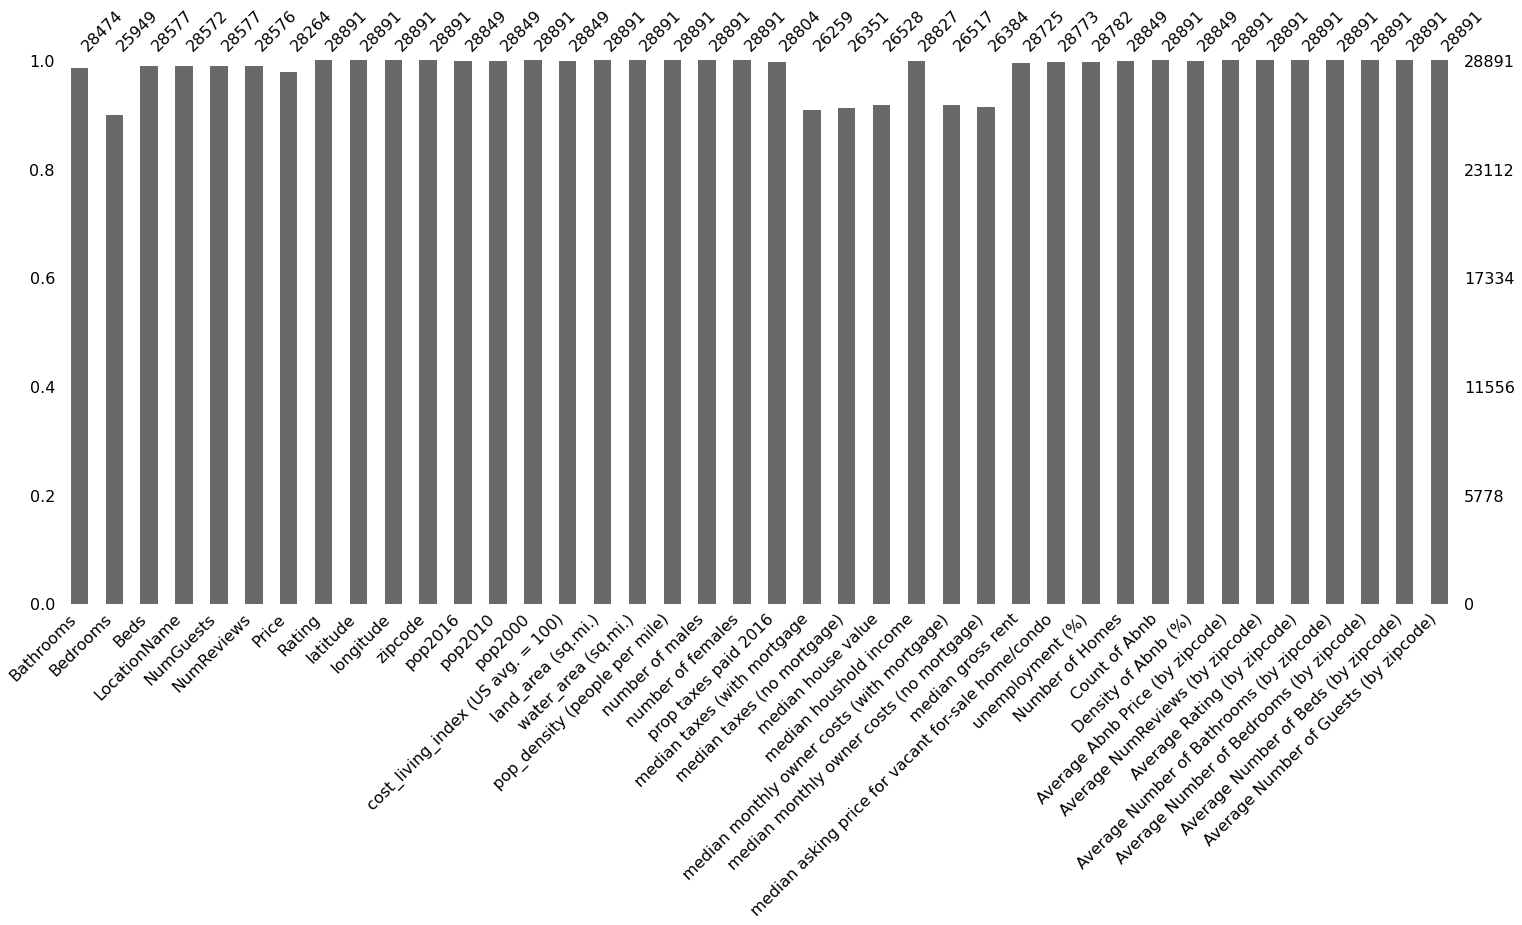

In [181]:
msno.bar(data) # Here bar plot for our data to see the missing values 

The above bar chart gives a quick graphical summary of the completeness of the dataset. 

We can observe that :-


 1- Bedrooms 

 2- median taxes (with mortgage)

 3- median taxes (no mortgage)

 4- median house value

 5- median monthly owner costs (with mortgage)

 6- median monthly owner costs (no mortgage)


-----------------------------------------------------------------
 Columns have missing values. But it makes sense if it could find out the location of the missing data
------------------------------------------------------------------
 The msno.matrix() is a nullity matrix that will help to visualize the location of the null observations.

# **Matrix Plot**

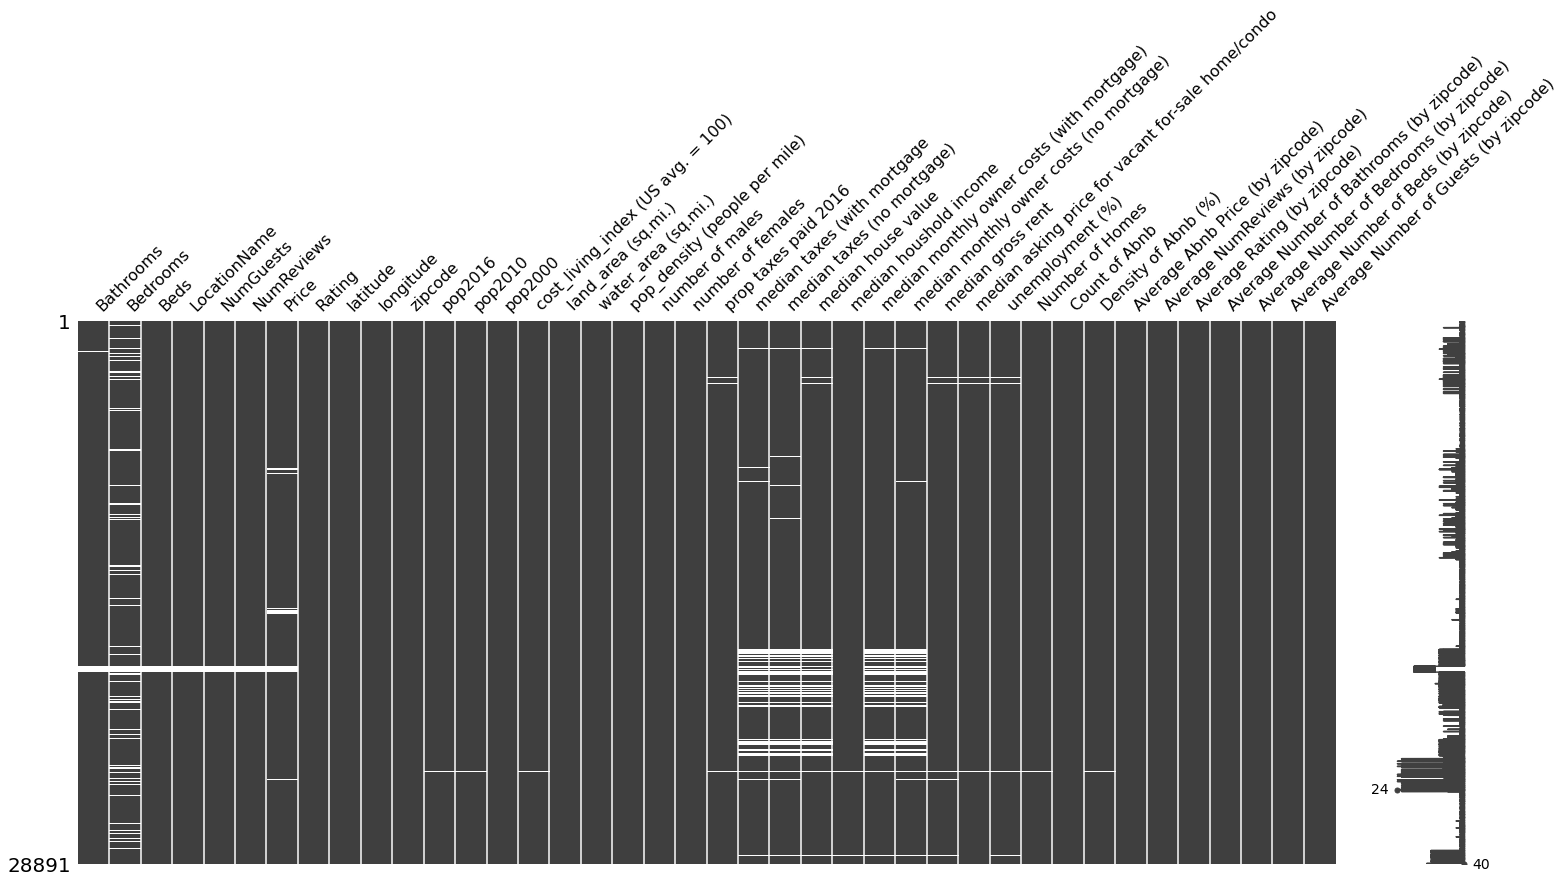

In [182]:
msno.matrix(data) # here we used Matrix Plot to check if Are there any variables often missing together 


Yes , There are variables often missing together as u see in Matrix plot 
#**Problem 1 (Multiple Imputer)**

1- median taxes (with mortgage)

2- median taxes (no mortgage)

3- median house  value

4- median monthly owner costs (with mortgage)

5- median monthly owner costs (no mortgage)

Noticed the five columns missing together according to graph with large portion of data with the same columns Missing Not at Random(MNAR)

--------------------------------------------------------------------------------

#**Problem 2 (Multiple Imputer)**

1- median houshold income

2- median gross rent

3- unemployment

Noticed the 3 columns missing together according to graph with small sample of data with the same columns Missing Not at Random(MNAR)

--------------------------------------------------------------------------------

#**Problem 3 (Single  Imputer)**

Fill the rest of columns in each column with most frequent elements to handle the rest of nans , it's consider as (MCAR)

Task 4: What are the potential mechnisms of the missing values? Briefely explain your methodology and your findings (within this markdown cell), and write corresponding code in the next code cell.

In [183]:
# TODO for Task 4
# here I will Explain how to handle all missing values in each problem 
# Problem 1 
'''
I noticed the values missing togther , they make pattern with themselves (MNAR)
The solution is using Nearest neighbors imputation for fill gaps of the five columns that i mention above and in the next cell u will 
see the code of handling this problem using (KNNImputer)  
'''
# Problem 2
'''
I noticed the values missing togther , they make pattern with themselves (MNAR)
The solution is using Nearest neighbors imputation for fill gaps of the 3 columns that i mention above and in the next cell u will 
see the code of handling this problem using (KNNImputer)  
'''


# Problem 3

'''
I noticed the rest of missing values in diffrenet columns without any reason (MCAR) and no relation of missing values 
-> the solution i will use simple imputer with most frequent items in each column
'''

'\nI noticed the rest of missing values in diffrenet columns without any reason (MCAR) and no relation of missing values \n-> the solution i will use simple imputer with most frequent items in each column\n'

Task 5: Handling missing values, Briefely explain your methodology below (within this markdown cell), and write corresponding code in the next code cell.

#**Solution For Problem 1 Using KNNImputer**

Missing: 0


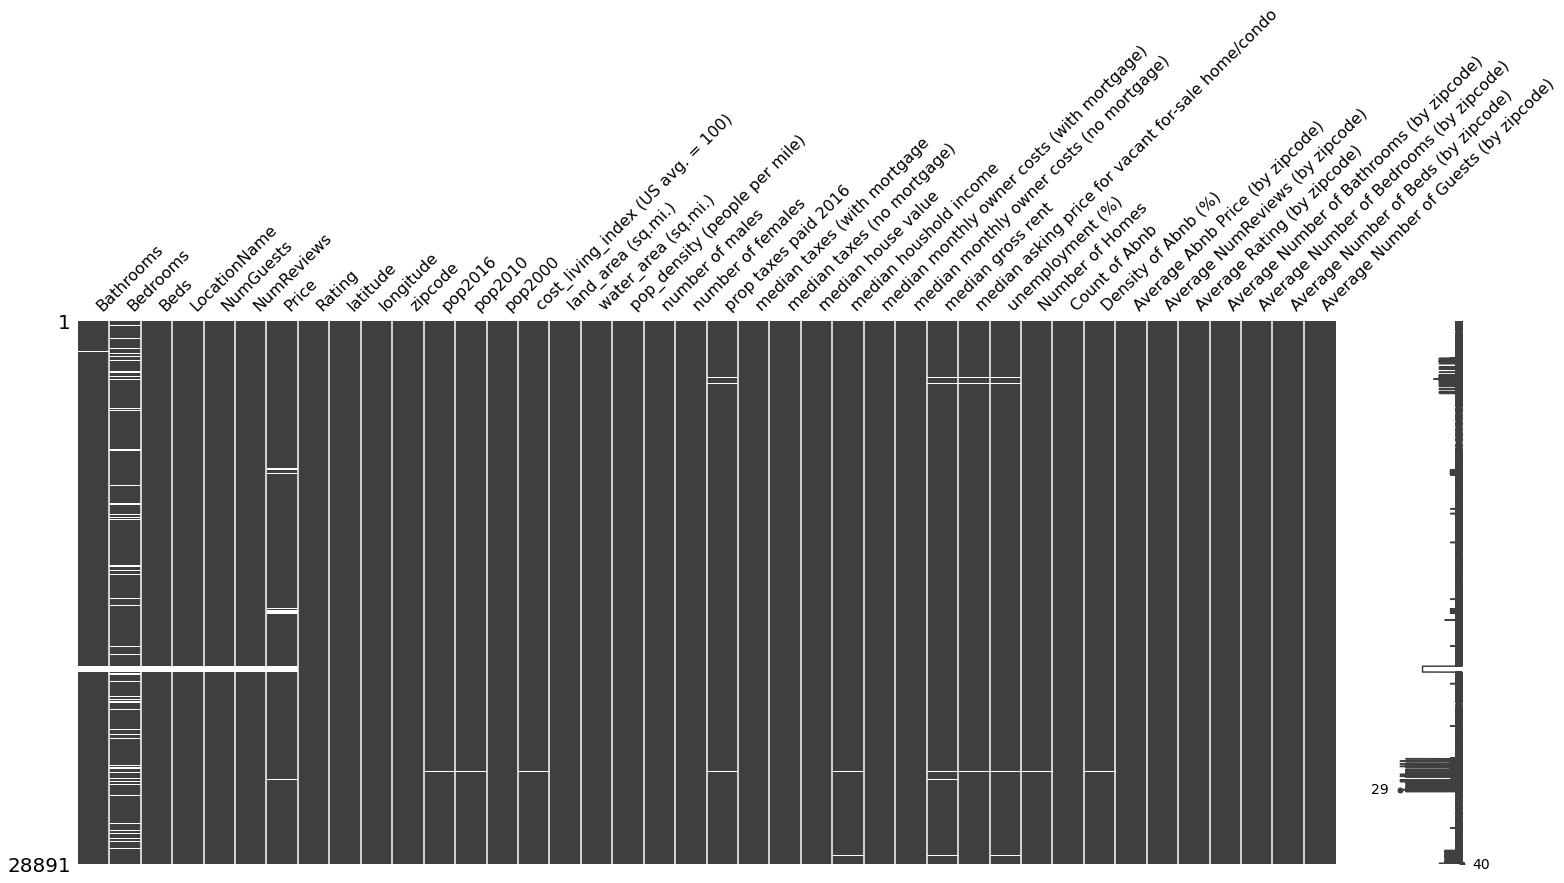

In [184]:
# TODO for Task 5
# Code for solve the problem 1
selected_Column=['median taxes (with mortgage','median taxes (no mortgage)','median house value','median monthly owner costs (with mortgage)',
 'median monthly owner costs (no mortgage)']

imputer = KNNImputer(n_neighbors=2, weights="uniform")
transform=imputer.fit_transform(data[selected_Column])
data[selected_Column]=transform
print('Missing: %d' % sum(isnan(transform).flatten()))

msno.matrix(data) # here we used Matrix Plot to check if Are there any variables often missing together 


#**Solution For Problem 2 Using KNNImputer**

Missing: 0


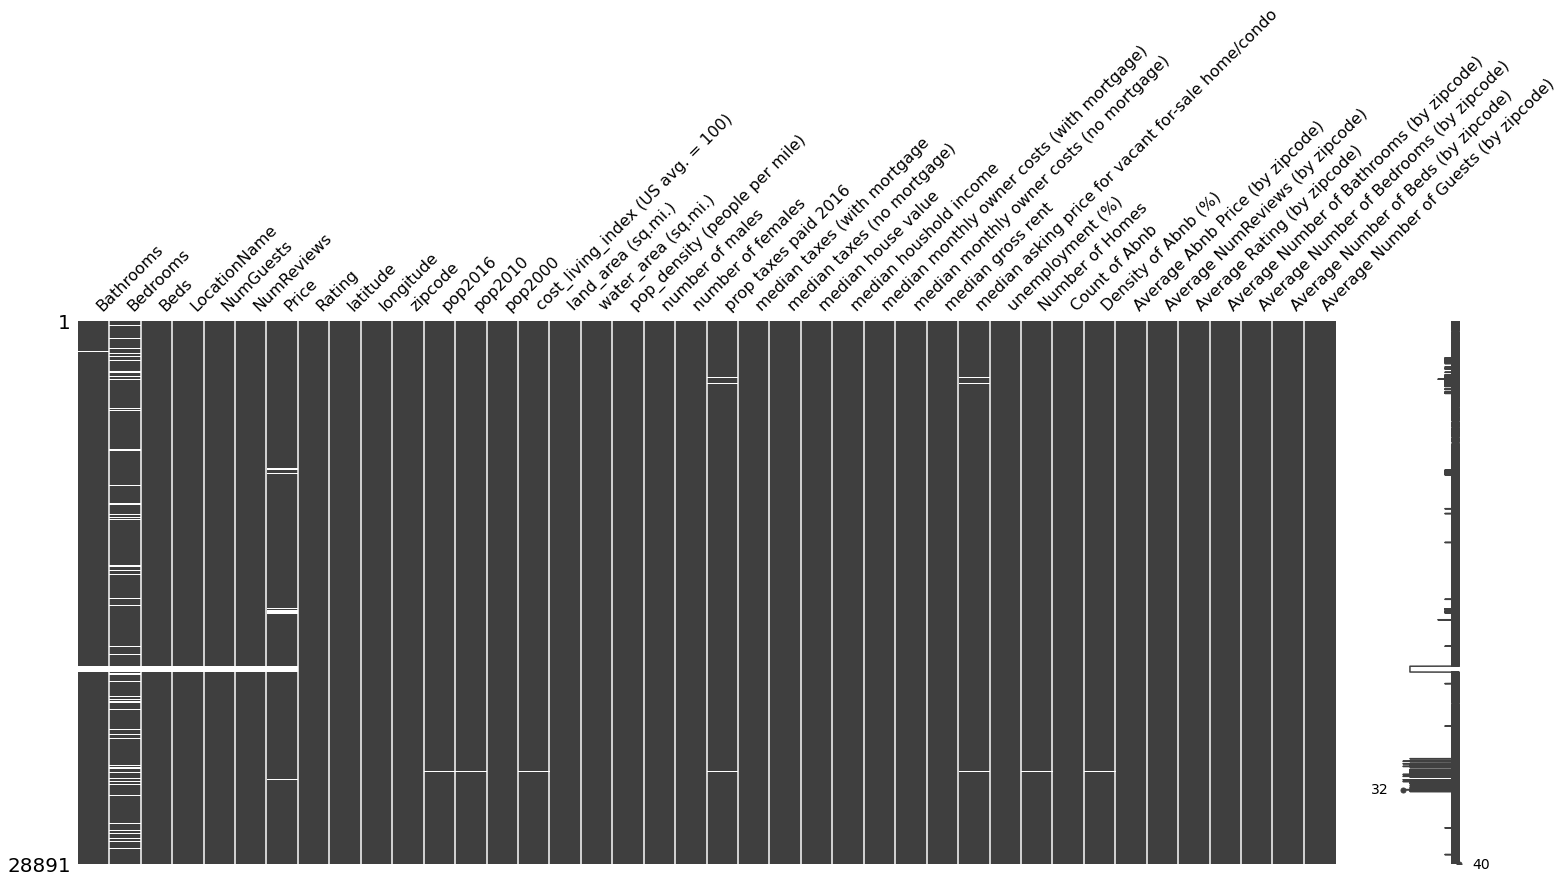

In [185]:
# Code for solve the problem 2
selected_Column=[
  'median houshold income'
, 'median gross rent',
'unemployment (%)'

]

imputer = KNNImputer(n_neighbors=2, weights="uniform")
transform=imputer.fit_transform(data[selected_Column])
data[selected_Column]=transform
print('Missing: %d' % sum(isnan(transform).flatten()))

msno.matrix(data) # here we used Matrix Plot to check if Are there any variables often missing together 


## **Solution For problem 3 (SimpleImputer Fill gaps with most_frequent strategy )**

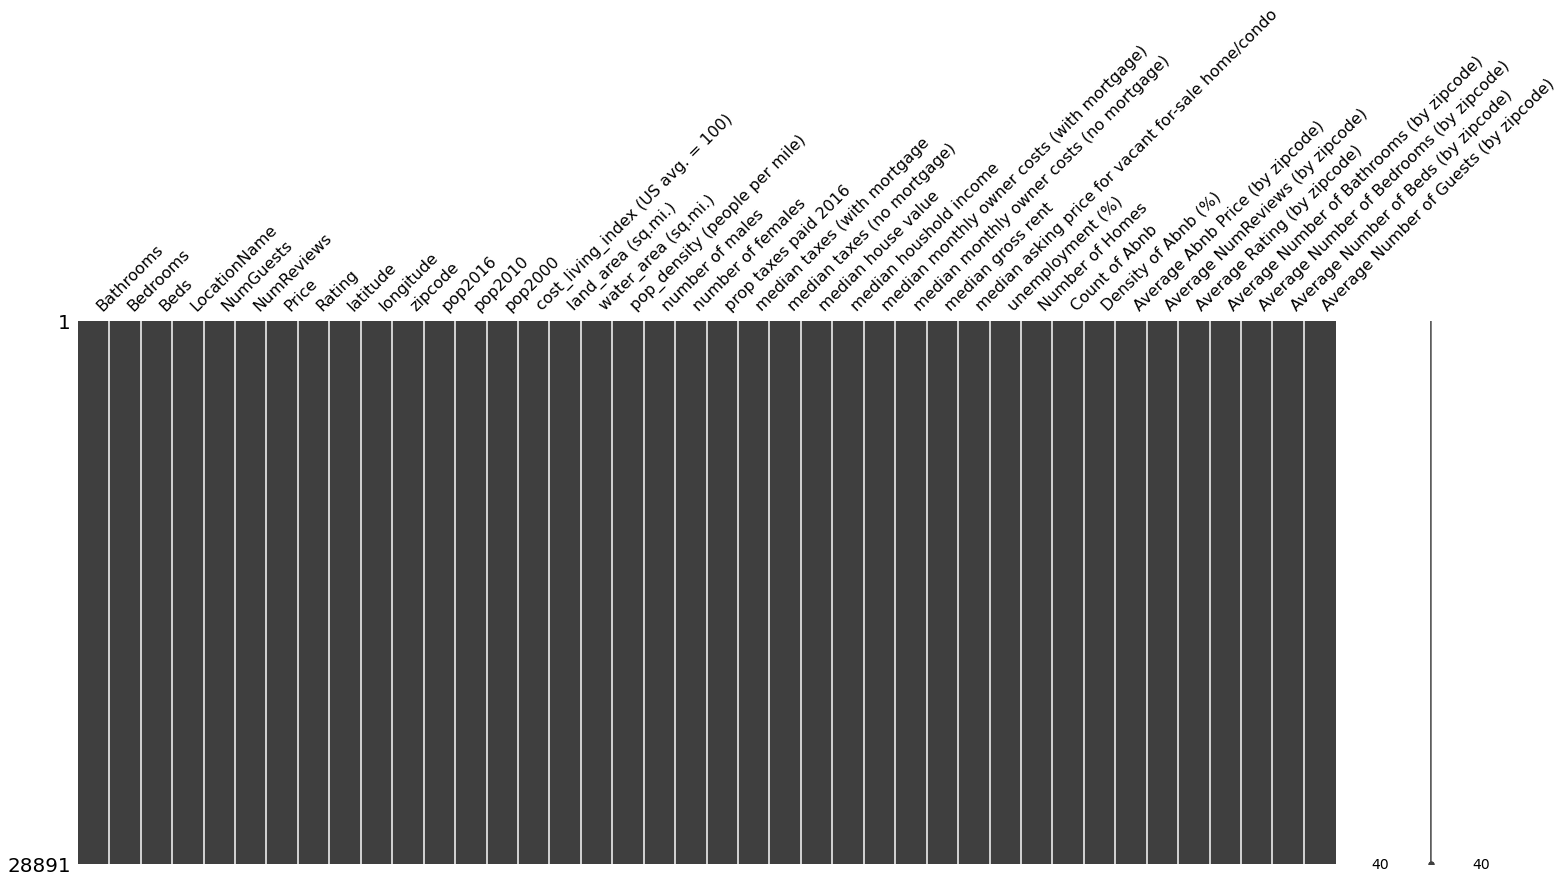

In [186]:
# using Simple Imputer to fill gaps with most_frequent strategy 
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data=pd.DataFrame(imp.fit_transform(data),
                   columns=data.columns,
                   index=data.index) 
msno.matrix(data) # check if all nans became zero

Task 6: Impact on classification performance. Consider one of the above handling method you proposed for this dataset and perform classification tast to investigate if your handling method can improve classificaiton performance. 

Train-test split: you can do one split of train and test where 70% of the data for training and the remaining 30% for testing. 
Classifier: you can pick any two tranditional binary classifier (e.g., from sklearn)

# **Preprocessing Steps**

# **1-Encoding the target values Using Label Encoding method**

Counter({1: 19378, 0: 9513})


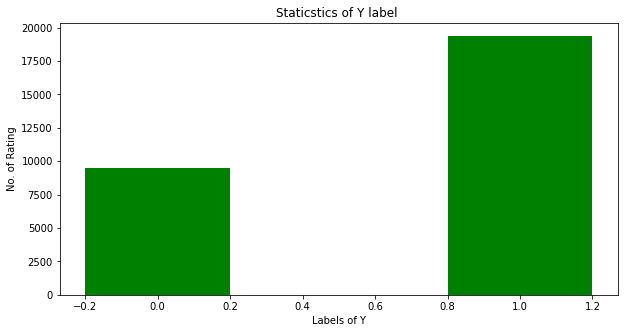

In [187]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data.Rating = labelencoder.fit_transform(data.Rating) # encoding the labels to zeros and ones 
response=Counter(data.Rating) # number of zeros and ones 
print(response)
courses = list(response.keys())
values = list(response.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.4)
 
plt.xlabel("Labels of Y")
plt.ylabel("No. of Rating")
plt.title("Staticstics of Y label ")
plt.show()

# **2- Convert Strings To numerical Values on (LOCATION NAME) COLUMN USING GET DUMMIES**

In [188]:
data = pd.get_dummies(data, columns = ["LocationName"])# apply this method on Location Name column
data

Bathrooms Bedrooms Beds NumGuests NumReviews  Price  Rating  latitude  \
0           1.0      1.0  1.0       2.0        7.0   38.0       1  33.75515   
1           1.0      1.0  1.0       2.0       15.0   38.0       0  33.82613   
2           2.0      2.0  2.0       4.0       17.0  100.0       1  33.75076   
3           1.0      1.0  1.0       2.0      304.0   78.0       1  33.77059   
4           1.0      1.0  1.0       2.0       19.0   50.0       1   33.7903   
...         ...      ...  ...       ...        ...    ...     ...       ...   
33140       1.0      1.0  2.0       5.0      159.0   67.0       0  38.90956   
33141       2.0      1.0  4.0       1.0       28.0   49.0       1   38.9092   
33142       1.0      1.0  1.0       2.0      106.0  120.0       1  38.88746   
33143       1.0      1.0  2.0       3.0      296.0   70.0       1  38.88535   
33144       1.0      1.0  1.0       2.0       10.0   45.0       1  38.84202   

      longitude zipcode  ... LocationName__________ LocationName_____________  \
0     -84.32992   30317  ...                      0                         0   
1     -84.33963   30324  ...                      0                         0   
2     -84.37058   30312  ...                      0                         0   
3     -84.33538   30307  ...                      0                         0   
4     -84.40027   30309  ...                      0                         0   
...         ...     ...  ...                    ...                       ...   
33140 -77.03107   20005  ...                      0                         0   
33141 -77.02622   20005  ...                      0                         0   
33142 -76.99119   20003  ...                      0                         0   
33143 -76.98183   20003  ...                      0                         0   
33144   -77.079   20037  ...                      0                         0   

      LocationName_bronx LocationName_brooklyn LocationName_flushing  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   
...                  ...                   ...                   ...   
33140                  0                     0                     0   
33141                  0                     0                     0   
33142                  0                     0                     0   
33143                  0                     0                     0   
33144                  0                     0                     0   

      LocationName_jackson heights LocationName_new york LocationName_queens  \
0                                0                     0                   0   
1                                0                     0                   0   
2                                0                     0                   0   
3                                0                     0                   0   
4                                0                     0                   0   
...                            ...                   ...                 ...   
33140                            0                     0                   0   
33141                            0                     0                   0   
33142                            0                     0                   0   
33143                            0                     0                   0   
33144                            0                     0                   0   

      LocationName_richmond hill LocationName_woodside  
0                              0                     0  
1                              0                     0  
2                              0                     0  
3                             

# **3- Extract the label from the Original dataset**

In [189]:
# TODO for Task 6
X=data.loc[:, data.columns != 'Rating']
Y=data["Rating"]


# **4-Split dataset into Training and testing Using train_test_split Function**

In [190]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,train_size=0.7, random_state=3,shuffle=True)


# **Using models**

In [191]:
def confusionMatricx(actual,predicted):
    results = confusion_matrix(actual, predicted)
    sns.heatmap(results, annot=True,fmt="d",cmap='Blues',xticklabels=["Class 0 ( NO )","Class 1 ( YES ) "], yticklabels=["Class 0 ( NO )","Class 1 ( YES ) "])
    plt.xlabel('Predicted Class', fontsize = 15)
    plt.ylabel('Actual Class', fontsize = 15)
    plt.show()
    print('Confusion Matrix :')
    print(results)
    print('Report : ')
    print(classification_report(actual, predicted))
    Precision=precision_score(actual, predicted, average='weighted')
    recall=recall_score(actual, predicted, average='weighted')
    F1Score=f1_score(actual, predicted, average='weighted')
    print("Recall",recall)
    print("Precision",Precision)
    print("F1Score",F1Score)
    return recall ,Precision,F1Score

# **LogisticRegression Model**

In [192]:
#LogisticRegression Function 
def LogisticRegression(c):
 # TODO
 cls = linear_model.LogisticRegression(C=c,solver="liblinear")
 cls.fit(X_train, Y_train)
 Y_predTrain = cls.predict(X_train)
 confusionMatricx(Y_train,Y_predTrain)
 print("Accuracy Of Train Logistic Regression : ",accuracy_score(Y_train, Y_predTrain))# Accuracy Score
 #
 Y_predTest = cls.predict(X_test)
 confusionMatricx(Y_test,Y_predTest)

 print("Accuracy Of Test Logistic Regression : ",accuracy_score(Y_test, Y_predTest))# Accuracy Score 
 print("*****************************************************************")


# **DecisionTree Classifier Model**

In [193]:
def DecisionTreeClassifierModel(MaxDepth):
  #Create a DecisionTreeClassifierModel Classifier
  clf = DecisionTreeClassifier(max_depth=MaxDepth) 
  #Train the model using the training sets
  clf.fit(X_train,Y_train)
  Y_pred = clf.predict(X_train)
  print("Accuracy Of Training Decision : ",accuracy_score(Y_train, Y_pred))# Accuracy Score
  confusionMatricx(Y_train,Y_pred)

  #
  Y_predTest = clf.predict(X_test)
  confusionMatricx(Y_test,Y_predTest)
  print("Accuracy Of Test Decision : ",accuracy_score(Y_test, Y_predTest))# Accuracy Score 


# **Invoke the modules**

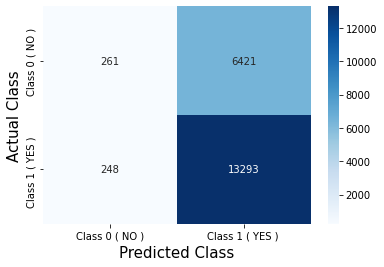

Confusion Matrix :
[[  261  6421]
 [  248 13293]]
Report : 
              precision    recall  f1-score   support

           0       0.51      0.04      0.07      6682
           1       0.67      0.98      0.80     13541

    accuracy                           0.67     20223
   macro avg       0.59      0.51      0.44     20223
weighted avg       0.62      0.67      0.56     20223

Recall 0.6702269692923899
Precision 0.6209228695408009
F1Score 0.5592900138524088
Accuracy Of Train Logistic Regression :  0.6702269692923899


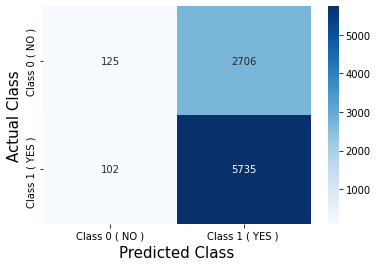

Confusion Matrix :
[[ 125 2706]
 [ 102 5735]]
Report : 
              precision    recall  f1-score   support

           0       0.55      0.04      0.08      2831
           1       0.68      0.98      0.80      5837

    accuracy                           0.68      8668
   macro avg       0.62      0.51      0.44      8668
weighted avg       0.64      0.68      0.57      8668

Recall 0.6760498384863867
Precision 0.6373680383948411
F1Score 0.5676628416132633
Accuracy Of Test Logistic Regression :  0.6760498384863867
*****************************************************************
Accuracy Of Training Decision :  0.7048904712456114


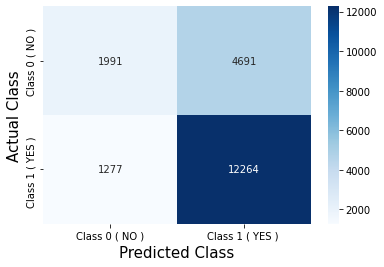

Confusion Matrix :
[[ 1991  4691]
 [ 1277 12264]]
Report : 
              precision    recall  f1-score   support

           0       0.61      0.30      0.40      6682
           1       0.72      0.91      0.80     13541

    accuracy                           0.70     20223
   macro avg       0.67      0.60      0.60     20223
weighted avg       0.69      0.70      0.67     20223

Recall 0.7048904712456114
Precision 0.6856308508135175
F1Score 0.6707807572609334


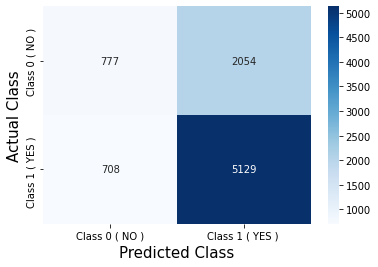

Confusion Matrix :
[[ 777 2054]
 [ 708 5129]]
Report : 
              precision    recall  f1-score   support

           0       0.52      0.27      0.36      2831
           1       0.71      0.88      0.79      5837

    accuracy                           0.68      8668
   macro avg       0.62      0.58      0.57      8668
weighted avg       0.65      0.68      0.65      8668

Recall 0.6813567143516382
Precision 0.651726277146209
F1Score 0.6481407934271624
Accuracy Of Test Decision :  0.6813567143516382


In [194]:
LogisticRegression(10) # Invoke LogisticRegression at c = 10 

DecisionTreeClassifierModel(7) # Invoke DecisionTreeClassifierModel Module at  max depth= 7 


Task 7: Report your findings through the above experiments (in this markdown cell)

**I use  percision and recall and accuracy and f1- score to compare between models**

As you see i used two model decision Tree and Logsitic Resgression :-

**The accuracy of decision tree is Larger than Logsitic Resgression**

**-> The results of Logsitic Resgression on Training data:-**

1- Recall 0.6782035257100987

2- Precision 0.6310127254529565

3- F1Score 0.5813130118354901

4- Accuracy Of Train Logistic Regression :  0.6782035257100987

**-> The results of Logsitic Resgression on Testing data:-**

1- Recall 0.6774939662107804

2- Precision 0.6254833168607505

3- F1Score 0.5788782109211627

4- Accuracy Of Test Logistic Regression :  0.6774939662107804


------------------------------------------------------------------------
**-> The results of Decision Tree on Training data :-**

1- Recall 0.7114348519460368

2- Precision 0.6938023631663959

3- F1Score 0.6433511453705985

4- Accuracy Of Train of decision Tree : 0.7114348519460368

----------------------------------------------------------------

**-> The results of Decision Tree on Testing data :-**

1- Recall 0.6888576025744167

2- Precision 0.6570022352552748

3- F1Score 0.6686915081360546

4- Accuracy Of Train of decision Tree :  0.6888576025744167


